#DESAFIO 5: PREPERE SEU DATASET PARA MODELAGEM PARA DADOS
  - Aplique os conhecimentos de limpeza e organização de dados (cleaning & data wrangling) para estruturar uma base de dados para modelagem.

#PROPOSTA
- R (Recenty) Tempo que o cliente realizou a ultima compra (em dias)
- F (Frequency) Quantidade de compras realizadas pelo cliente
- M (Monetary) Valor do ticket médio gasto pelo cliente, onde ticket médio = médio do total gasto por pedido para cada cliente.

#DESENVOLVA
 - UM CÓDIGO EM PYTHON QUE GERA UM OUTPUT EM .CSV CONTENDO  APENAS: IDENTIFICAÇÃO DO CLIENTE E MÉTRICAS RFM.

**INICIANDO DESENVOLVIMENTO DO PROJETO**
 - CARREGANDO BIBLIOTECAS QUE SERÃO UTILIZADAS PARA ANALISES DOS DADOS

In [76]:
import os.path

import numpy as np
import pandas as pd
#INSTALAR !pip install pandas-profiling==3.3.0 ANTES PARA PODER USÁ-LO, caso precise!
#from pandas_profiling import ProfileReport


import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from matplotlib.ticker import FuncFormatter
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder


In [77]:
from sklearn import set_config
set_config(display='diagram')

In [131]:
#Utilizando o ON_BAD_LINES='SKIP' para pular as linhas com erro na base de dados, caso precise usar, isso evita o erro de tokenization data.

caminho = os.path.join('raw', 'e-commerce.csv')
df = pd.read_csv(caminho, sep=',', quotechar='"', on_bad_lines='skip')
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**ETAPA 1)**
- 2 - Utilize o describe para verificar a distribuição dos dados

**DESCRIBE**
- *A função describe()* ela fornece informações importantes sobre a distribuição dos dados permitindo insights(percepções) valiosos sem a necessidade de visualizações complexas.
- Exibe *estatíscas descritiva*, como count(número de valores não nulos), mean(média), std(desvio padrão), min(valor mínimo) e max(valor máximo).
- *Utilidade dos quartis na segmentação(dividir algo em diferentes segmentos que possuam características similares individualmente, mas sejam distintos entre si) e compreensão dos dados:* 25% (percentil), 50% (percentil), 75% (percentil) dos valores. Essa técnica permite segmentar e compreender a distribuição dos dados por percentis, fornecendo insights valiosos para análises de negócio.

In [132]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Etapa 1)**  
- 3 - Analise o tipo dos dados

 *A função info() no Pandas exibe informações detalhadas sobre um DataFrame(df), incluindo número de linhas (entradas), tipo de dados (dtypes) de cada coluna, quantidade de dados não nulos em cada coluna e uso de memória. Isso permite rapidamente verificar se existem dados nulos, entender quais tipos de dados estão presentes (strings, numéricos, datas etc.) e identificar problemas como dados inconsistentes.*

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Dtype**
- ***object**: É uma array (arranjo ou vetor) é um conjunto de dados, que pode assumir os mais diversos tipos. Array é utilizado para armazenar mais de um valor em uma única variável.*
- ***int64**: É um formato inteiro com 64 bits ou 8 bytes  de espaço disponível.*
- ***float64**: É um formato de número de ponto flutuante, geralmente ocupando 64 bits na memória do computador.*

#Etapa 02) Valores faltantes na identificação do cliente


Etapa 2)
- 1 - Verifique os valores nulos com o isna() e utilize a função sum() para a
somar a quantidade de nulos
- Critérios de Avaliação: Verifique se há valores faltantes na identificação do cliente



In [134]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Etapa 2)
- 2 - Utilize a função dropna para remover os nulos


In [135]:
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#Etapa 03) Preços unitários e quantidade de produtos iguais ou inferior a 0

Etapa 3)
- 1 - Realize um filtro para verificar se existem dados nulos ou menor que
zero na coluna de preços
- CRITÉRIO DE AVALIAÇÃO: Verifique se há produtos com quantidade igual ou inferior a 0

In [136]:
#1 - Realize um filtro para verificar se existem dados nulos ou menor que zero na coluna de preços
df[(df['UnitPrice'].isnull()) | (df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [137]:
##CRITÉRIO DE AVALIAÇÃO: Verifique se há produtos com preços unitários iguais ou inferior a 0
df[(df['UnitPrice'] == 0) | (df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,NaN,United Kingdom


In [138]:
#CRITÉRIO DE AVALIAÇÃO: Removendo produtos com preços unitários iguais e inferiores a 0
df = df[(df['UnitPrice'] >= 0)]

In [139]:
#CRITÉRIO DE AVALIAÇÃO: Verifique se há produtos com quantidade igual ou inferior a 0
df[(df['Quantity'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Etapa 3)
- 2 - Filtre o dataset apenas para conter preços acima de zero

In [140]:
#2 - Filtrando o dataFrame.
df[df['UnitPrice'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Etapa 3)
- 3 - Realize um filtro para verificar se existem dados nulos ou menor que
zero na coluna de quantidade

In [141]:
#Filtrando o DataFrame.
df[df['Quantity'].isna() | (df['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Etapa 3)
- 4 - Filtre o dataset apenas para conter quantidade acima de zero

In [143]:
#Filtre o dataset apenas para conter quantidade acima de zero
df = df[df['Quantity'] > 0]

#Etapa 04) Verifique se existem linhas duplicadas


Etapa 4)
- 1 - Verifique se tem linhas duplicadas com a função duplicated

In [145]:
print('Tem linhas duplicadas? (SIM-True) / NÂO(False): ', df.duplicated().sum().any())

Tem linhas duplicadas? (SIM-True) / NÂO(False):  True


In [146]:
print('Quantas linhas duplicadas há na base de dados?: ', df.duplicated().sum(), 'linhas')

Quantas linhas duplicadas há na base de dados?:  5231 linhas


#Etapa 4)
- 2 - Drope as linhas duplicadas


In [147]:
#Apagando linhas duplicadas do DataFrame
df = df.drop_duplicates()
#Verificando novamente se restaram linhas duplicadas na base de dados!
print('Quantas linhas duplicadas restaram na base de dados?: ', df.duplicated().sum(), 'linhas')

Quantas linhas duplicadas restaram na base de dados?:  0 linhas


#**Etapa 05) Tipos de dados da coluna**
5.1) Corrija o tipo de dados para:
- InvoiceNo -> object / str
- StockCode -> object / str
- Description -> object / str
- Quantity -> int
- InvoiceDate -> datetime
- UnitPrice -> float
- CustomerID -> int
- Country -> object / str

**MAP, EXPRESSÃO LAMBDA e UNIQUE**
- ***map()*** é uma função de transformação ou mapeamento a cada elemento de um DataFrame(df), resultante em um novo DataFrame(df) com os valores modificados.
- A função de *Mapa* é uma ferramenta versátil para manipulação de dados, permitindo que execute operações e transformações em elementos DataFrame e Series.
- ***Expressão lambda*** é uma *função* anônima de forma rápida e simples. Em vez de criar uma *função* nomeada, cria-se essa *função lambda* diretamente no código.
- ***A função unique()*** retorna as linhas únicas do intervalo de origem, descartando as duplicadas. As linhas são retornadas na ordem em que são exibidas no intervalo de origem.


#Tratando possível erro de conversão logo de ínicio
Repare no erro logo abaixo na coluna **CustomerID**

- ValueError: cannot convert float NaN to integer:
- Erro ocorreu quando tentei converter a coluna(float) para (inteiro), mas a coluna contém valores NaN(valores não válidos)

In [148]:
#Convertendo CustomerID to int
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [149]:
#Quantidade de valores ausentes(NaN) por colunas na tabela acima:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133320
Country             0
dtype: int64

**Estratégia:** escolho manter a coluna ['CustomerID']
- Identificar registros com CustomerID ausente
- Agrupar, filtrar ou modelar sem perder dados.

In [151]:
df['CustomerID_ausente'] = df['CustomerID'].isna()

In [152]:
df['CustomerID'] = df['CustomerID'].fillna(-1).astype('int')

In [153]:
#Verificando se restaram valores faltantes na base de dados, novamente.
df.isna().sum()

InvoiceNo               0
StockCode               0
Description           592
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
CustomerID_ausente      0
dtype: int64

In [154]:
#Criando uma nova coluna InvoiceNo do tipo 'str'.
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [155]:
#Verificando a propriedade da coluna InvoiceNo.
df['InvoiceNo'].map(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

In [156]:
#Criando uma nova coluna StockCode do tipo 'str'.
df['StockCode'] = df['StockCode'].astype(str)

In [157]:
#Verificando a propriedade da coluna StockCode.
df['StockCode'].map(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

In [158]:
#Criando uma nova coluna Description do tipo 'str'.
df['Description'] = df['Description'].astype(str)

In [159]:
#Verificando a propriedade da coluna Description.
df['Description'].map(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

In [160]:
#Criando uma nova coluna Quantity do tipo 'int'.
df['Quantity'] = df['Quantity'].astype(int)

In [161]:
#Verificando a propriedade da coluna Quantity.
df['Quantity'].map(lambda x: type(x)).unique()

array([<class 'int'>], dtype=object)

In [162]:
#Criando uma nova coluna InvoiceDate do tipo 'datetime'.
df['InvoiceDate'] = df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [163]:
#Analisando o tipo de dado da coluna InvoiceDate
df['InvoiceDate'].map(lambda x: type(x)).unique()

array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object)

In [164]:
#Criando uma nova coluna UnitPrice do tipo 'float'.
df['UnitPrice'] = df['UnitPrice'].astype(float)

In [165]:
#Verificando a propriedade da coluna UnitPrice.
df['UnitPrice'].map(lambda x: type(x)).unique()

array([<class 'float'>], dtype=object)

In [166]:
#Criando uma nova coluna CustomerID do tipo 'int'.
df['CustomerID'] = df['CustomerID'].astype(int)

In [167]:
#Verificando a propriedade da coluna CustomerID
df['CustomerID'].map(lambda x: type(x)).unique()

array([<class 'int'>], dtype=object)

In [168]:
#Criando uma nova coluna Country do tipo 'str'.
df['Country'] = df['Country'].astype(str)

In [169]:
#Verificando a propriedade da coluna Country
df['Country'].map(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

#Etapa 06) Tratando os outliers

#*O que são outliers?*
*Outliers, ou valores discrepantes, são observações nos dados que se diferenciam drasticamente da distribuição principal. Eles podem representar pontos problemáticos que impactam as análises.*
- Dica: Vamos considerar estes valores como erro.Visualize os outliers e
remova os outliers extremos em que a quantidade do item na compra é
superior a 10.000, e o preço unitário é maior que 5.000.

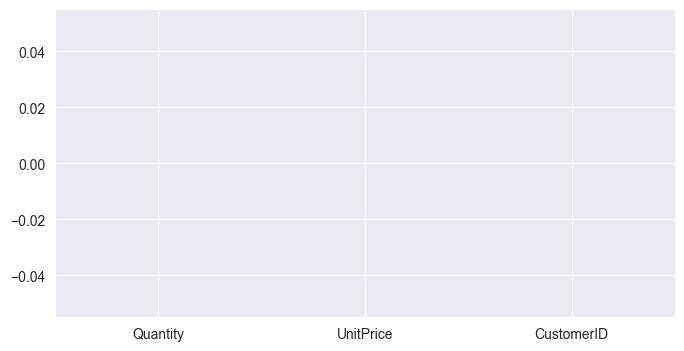

In [68]:
colunas_numericas = df.select_dtypes('number').columns
df[colunas_numericas].apply(scale).plot.box(figsize=(8,4));

In [69]:
#Filtrando valores discrepantes(outliers)
Outliers = df.loc[(df['Quantity'] > 10000 ) | (df['UnitPrice'] > 5000), ['Quantity', 'UnitPrice']]

- Removendo índices dos valores discrepantes

In [70]:
cont = 0
for outliers in Outliers.index:
  df = df.drop(index=outliers)
  cont += 1
print(cont, 'Outliers removidos!')

0 Outliers removidos!


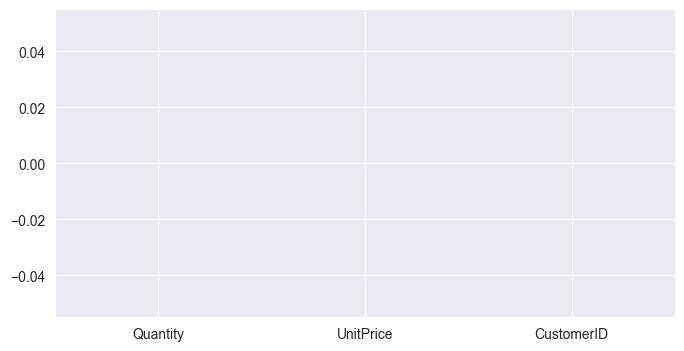

In [71]:
colunas_numericas = df.select_dtypes('number').columns
df[colunas_numericas].apply(scale).plot.box(figsize=(8,4));

#Etapa 07) Crie uma coluna adicional


- Dica: Utilize as colunas Quantity e UnitPrice.
- Crie uma coluna adicional
com o preço total da compra

In [72]:
total_da_compra = df['Quantity']*df['UnitPrice']
df['total_da_compra'] = total_da_compra
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_da_compra


#Etapa 08) Última data
- Dica: Utilize a função max().
- Calcule a data da última compra no
dataset como um todo, pois vamos utilizar este valor como data de
comparação para cálculo da recência.


In [73]:
dia_do_hit = df['InvoiceDate'].max() + pd.Timedelta(days=1)

#Etapa 09) Plotando gráficos
- Top 10 países com maior valor em venda

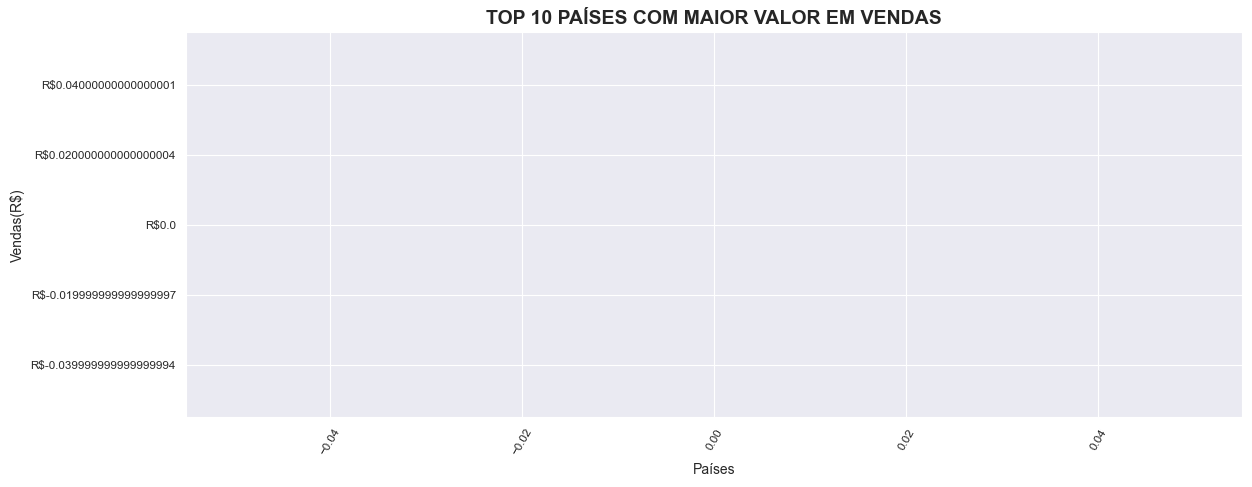

In [74]:
def mil (x, pos):
  if x >= 1000000:
    return f'R${x/1000000:} milhões'
  elif x >= 1000:
    return f'R${x/1000:} mil'
  else:
    return f'R${x:}'


paises_maiores_vendedores = df.groupby(['Country'])['total_da_compra'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(30, 5))
ax = plt.subplot(1,2,1)
plt.bar(paises_maiores_vendedores.index, paises_maiores_vendedores.values, color='lightblue')
ax.yaxis.set_major_formatter(FuncFormatter(mil))
plt.xlabel("Países")
plt.ylabel("Vendas(R$)")
plt.title("TOP 10 PAÍSES COM MAIOR VALOR EM VENDAS", fontsize=14, weight='bold')
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small');

- Top 10 produtos mais vendidos

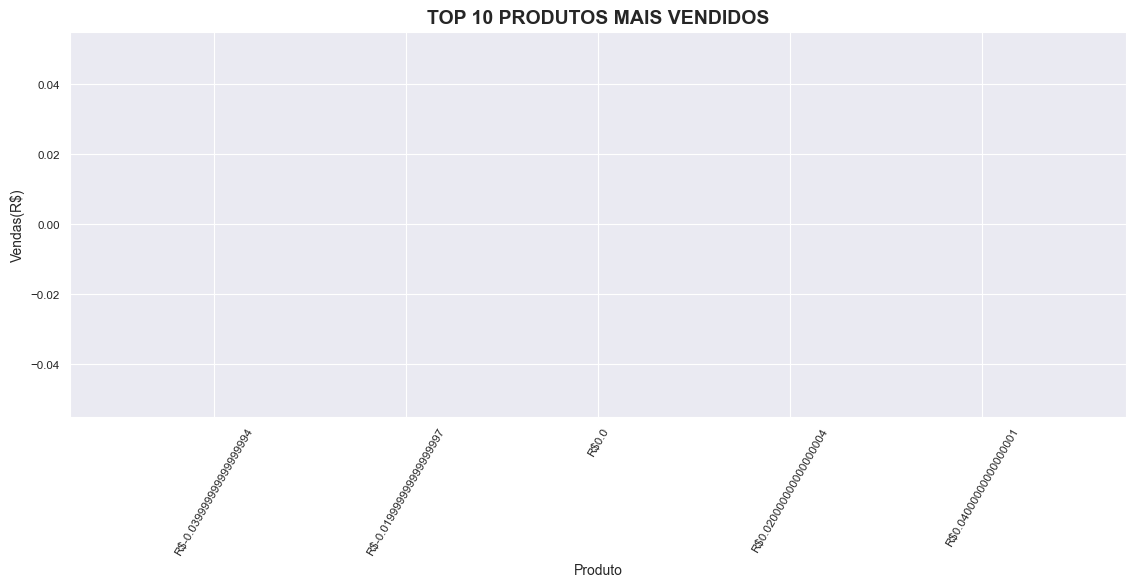

In [75]:
def mil (x, pos):
  if x >= 1000000:
    return f'R${x/1000000:} milhões'
  elif x >= 1000:
    return f'R${x/1000:} mil'
  else:
    return f'R${x:}'

formatador = FuncFormatter(mil)
produtos_top10 = df.groupby(['Description'])['total_da_compra'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(30, 5))
ax = plt.subplot(1,2,1)
plt.barh(produtos_top10.index, produtos_top10.values, color='lightblue')
ax = ax.xaxis.set_major_formatter(formatador)
plt.xlabel("Produto")
plt.ylabel("Vendas(R$)")
plt.title("TOP 10 PRODUTOS MAIS VENDIDOS", fontsize=14, weight='bold')
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small');

- Valor de venda total por mês


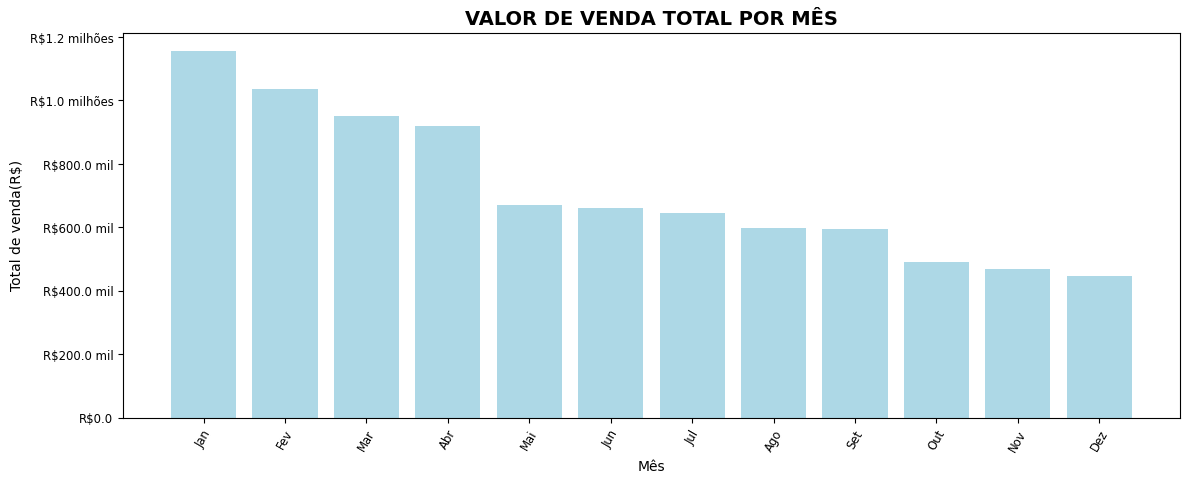

In [309]:
def mil (x, pos):
  if x >= 1000000:
    return f'R${x/1000000:} milhões'
  elif x >= 1000:
    return f'R${x/1000:} mil'
  else:
    return f'R${x:}'

FuncFormatter(mil)
mes = df['InvoiceDate'].dt.month
total_da_compra_mes = df.groupby(mes)['total_da_compra'].sum().sort_values(ascending=False)
total_da_compra_mes.index = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.figure(figsize=(30, 5))
ax = plt.subplot(1,2,1)
ax.yaxis.set_major_formatter(FuncFormatter(mil))
plt.bar(total_da_compra_mes.index, total_da_compra_mes.values, color='lightblue')
plt.xlabel("Mês")
plt.ylabel("Total de venda(R$)")
plt.title("VALOR DE VENDA TOTAL POR MÊS", fontsize=14, weight='bold')
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small');

- Valor de venda total por mês e por país (considere apenas os top 10)

In [325]:
# ..

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Etapa 10) Cálculo do RFM
- Dica: Agrupe os dados por cliente e pedido/compra (InvoiceNo) e
obtenha a data e o preço total do pedido.
- Com isso, agrupe novamente apenas por cliente e calcule o RFM, onde:
- R é a recência, diferença em dias da última compra do cliente e da
última compra disponível no conjunto de dados, que calcularam
previamente.
- F é a frequência, ou seja, a quantidade de compras feitas pelo
cliente;
- M é o ticket médio, ou seja, a média das compras feitas pelo cliente.


In [311]:
rfm = df.groupby(['InvoiceNo']).agg({'InvoiceDate': lambda x : (dia_do_hit - x.max()).days, 'InvoiceNo':'count','total_da_compra': 'sum'})
rfm.columns = ['R', 'F', 'M']
display(rfm)

,R,F,M
InvoiceNo,,,
536365,374,7,139.12
536366,374,2,22.20
536367,374,12,278.73
536368,374,4,70.05
536369,374,1,17.85
...,...,...,...
581583,1,2,124.60
581584,1,2,140.64
581585,1,21,329.05
